# Default Risk Rating with Machine Learning

## Applied Statistics

## Problem


A financial company asks you to perform a default risk rating. They have data about historic customer  behaviour at  the  time  of  the  loan  application. Before  they  award  new  loans, they predict the default risk based on this information. You  get  access  to  detailed  data  about 250,000 loans.  The  data  contains socio-economic characteristics,  employment  information,  and  wealth  status.  Furthermore,  you  observe whether a loan of the customer defaulted in the past or not. Your task as data analyst is to predict the default risk. For this purpose, you can use classical estimation  methods  and  more  advanced unsupervised  machine  learning  methods. The ultimate goal is to develop a tool, that enables the financial company to measure default risk in an easy interpretable way.


DATA :

- Microdata from internal records of the financial company.

- The data comprises information on past defaults, income, age, experience, marital status, property, employment, and residency.

- Additional data about  the  business  cycle  can  be  merged  based  on  regional information.



INDICATIVE BIBLIOGRAPHY

G.James, T.Hastie, D.Witten, R.J.Tibshirani (2021): An Introduction to Statistical Learning: With Applications in R, 2nd edition, Springer, https://www.statlearning.com/ 


### Framing the problem

...    

## Getting the data

In [1]:
import pandas as pd
import numpy as np
import copy as c
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns

In [2]:
with open(r"data/description.txt") as f:
    contents = f.read()
    print(contents)

CONTEXT
An organization wants to predict who possible defaulters are for the consumer loans product. 
They have data about historic customer behavior based on what they have observed. 
Hence when they acquire new customers they want to predict who is riskier and who is not.

CONTENT
All values were provided at the time of the loan application.

Column			Description					Type
income			Income of the user				int
age			Age of the user					int
experience		Professional experience of the user in years	int
profession		Profession					string
married			Whether married or single			string
house_ownership		Owned or rented or neither			string
car_ownership		Does the person own a car			string
risk_flag		Defaulted on a loan				string
currentjobyears		Years of experience in the current job		int
currenthouseyears	Number of years in the current residence	int
city			City of residence				string
state			State of residence				string

The risk_flag indicates whether there has been a default in the past or not.


In [3]:
data=pd.read_csv(r"data/default data.csv")
data = data.set_index('Id')
data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


The dataset contains no missing values.

In [5]:
data.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Pour analyser numériquement le jeu de données, il serait sans doute judicieux de transformer les réponses de type oui/non en variables binaires 1/0.

In [6]:
data.sample(10)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
251342,5065445,43,7,single,rented,yes,Comedian,Karimnagar,Telangana,7,14,0
125610,9504715,51,14,single,rented,yes,Consultant,Akola,Maharashtra,14,10,0
59834,2192899,45,12,single,rented,no,Drafter,Giridih,Jharkhand,6,10,0
215568,9627539,56,2,single,rented,yes,Designer,Varanasi,Uttar_Pradesh,2,13,0
125943,2869872,56,19,single,rented,no,Drafter,Dibrugarh,Assam,11,12,0
125522,4470476,38,0,single,rented,yes,Analyst,Srinagar,Jammu_and_Kashmir,0,13,0
177294,9335602,49,17,single,rented,no,Air_traffic_controller,Bhopal,Madhya_Pradesh,8,11,0
141109,7556569,72,6,single,rented,no,Artist,Purnia[26],Bihar,6,11,0
101500,1780115,34,2,single,rented,no,Secretary,Firozabad,Uttar_Pradesh,2,13,0


## Data exploration

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'CURRENT_JOB_YRS'}>],
       [<AxesSubplot:title={'center':'CURRENT_HOUSE_YRS'}>,
        <AxesSubplot:title={'center':'Risk_Flag'}>]], dtype=object)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
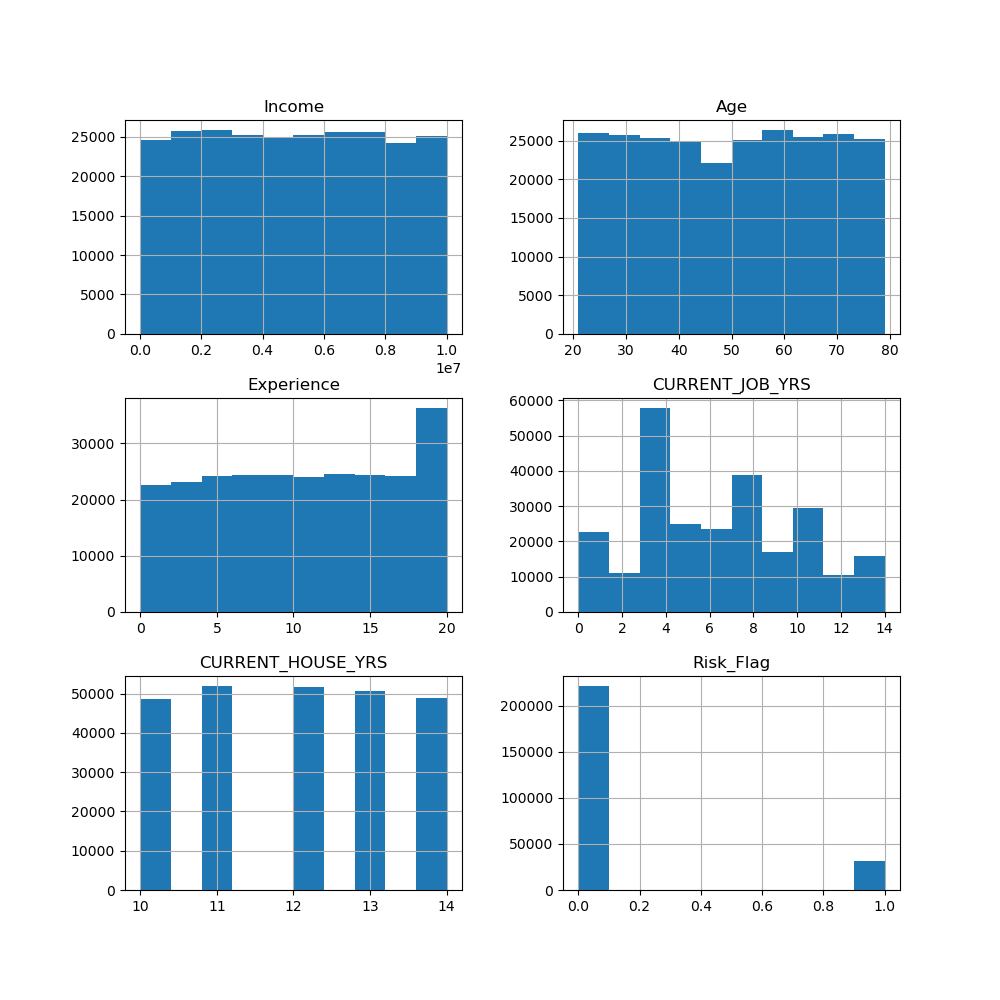

In [7]:
data.hist(figsize=(10,10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
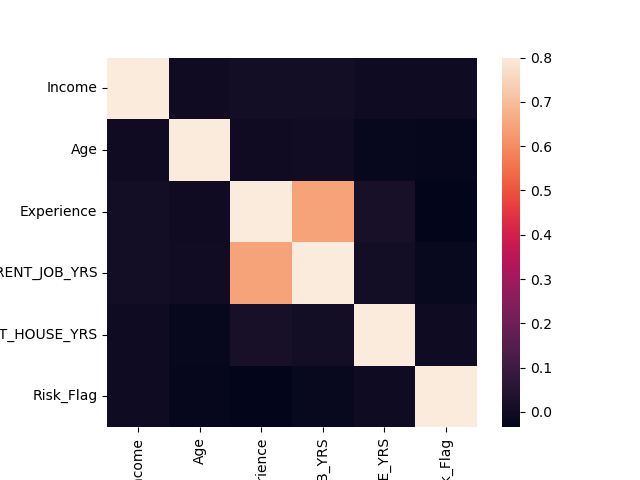

In [8]:
corrmat = data.corr()
plt.figure()
sns.heatmap(corrmat, vmax=.8, square=True);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
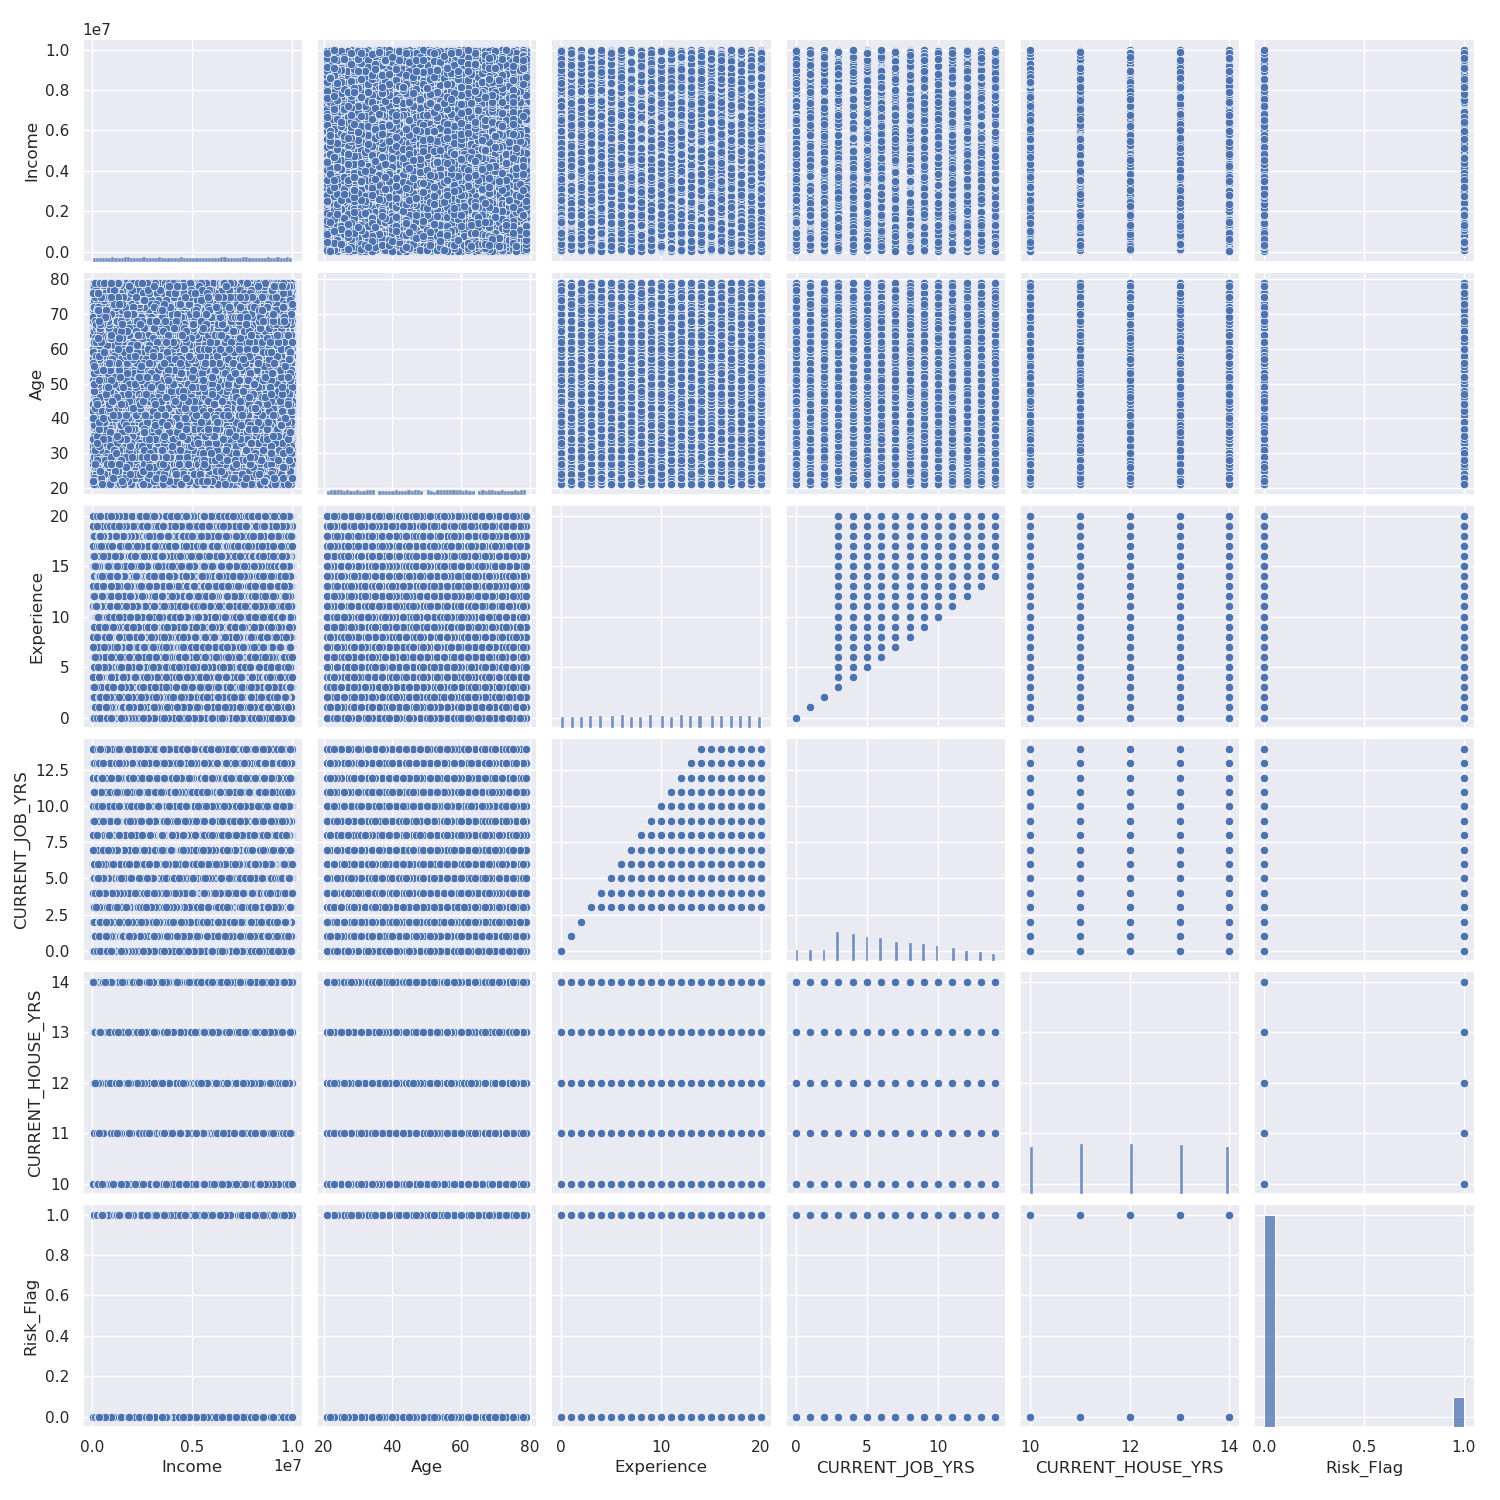

In [9]:
sns.set()
sns.pairplot(data, height = 2.5)
plt.show();

## Data preparation

### Transformation of binary variables and MinMax scaling

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

num_pipeline = Pipeline([
        ('min_max_scaler', MinMaxScaler()), # we use MinMax since we saw there was no outliers in the data
    ])

In [11]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
cat_attribs = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # for the moment we could only use MinMaxScaler() here instead of a pipeline, but we might want to add more preprocessing steps in the future
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df = full_pipeline.fit_transform(data)
df_rf = data['Risk_Flag'].copy()

## First models

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # cross_val_score(clf, x_train, y_train, cv=10)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df, df_rf, test_size = 0.2, random_state = 0)

### Logistic Regression

In [14]:
clf = LogisticRegression().fit(x_train, y_train)
predictions = clf.predict(x_test)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     44259
           1       0.00      0.00      0.00      6141

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
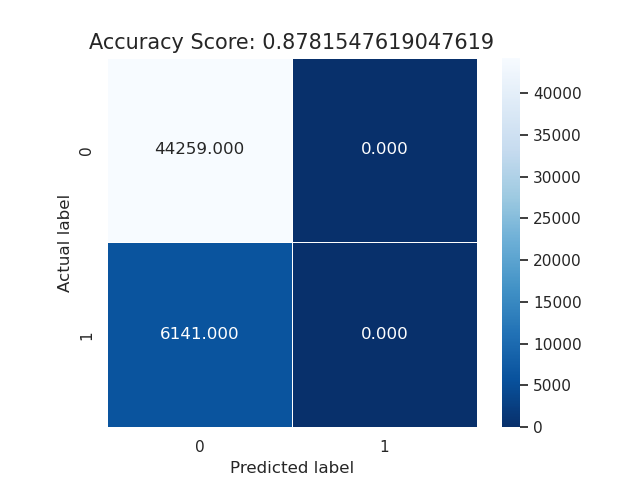

In [16]:
cm = metrics.confusion_matrix(y_test, predictions)
score = clf.score(x_test, y_test)

plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### KNN

In [17]:
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)
predictions = neigh.predict(x_test)

In [18]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     44259
           1       0.56      0.50      0.53      6141

    accuracy                           0.89     50400
   macro avg       0.74      0.72      0.73     50400
weighted avg       0.89      0.89      0.89     50400



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
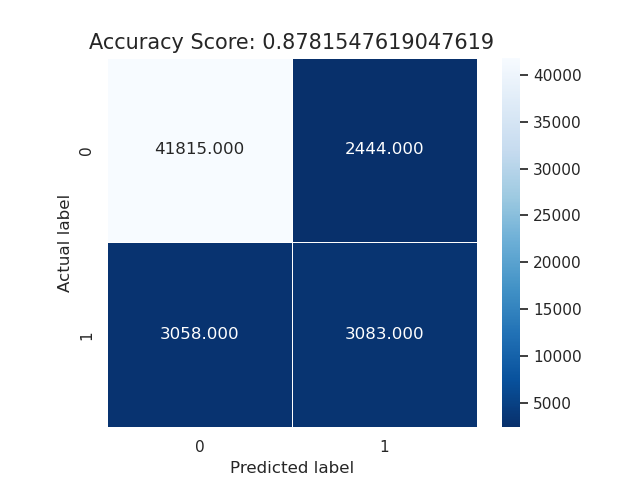

In [19]:
cm = metrics.confusion_matrix(y_test, predictions)
score = clf.score(x_test, y_test)

plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Decision Tree

In [20]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

In [21]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     44259
           1       0.53      0.55      0.54      6141

    accuracy                           0.89     50400
   macro avg       0.73      0.74      0.74     50400
weighted avg       0.89      0.89      0.89     50400



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
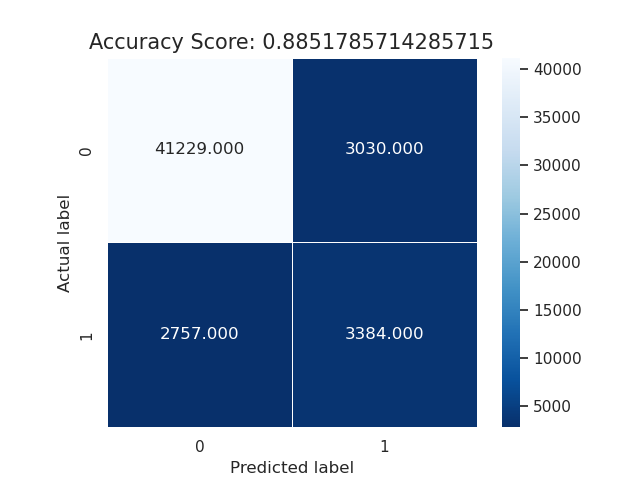

In [22]:
cm = metrics.confusion_matrix(y_test, predictions)
score = clf.score(x_test, y_test)

plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Random Forest

In [23]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

In [24]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     44259
           1       0.60      0.52      0.56      6141

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
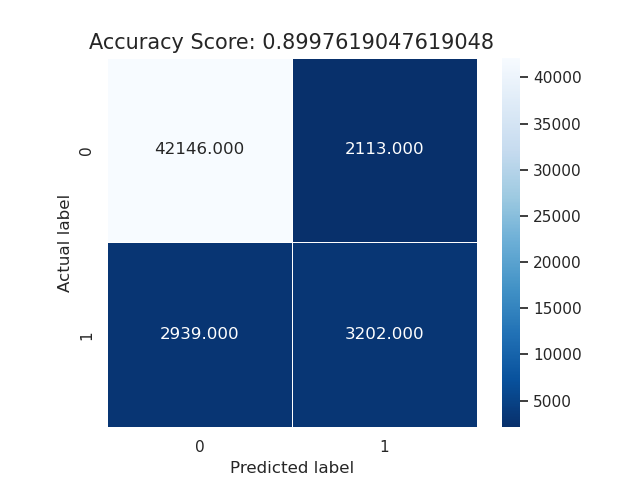

In [25]:
cm = metrics.confusion_matrix(y_test, predictions)
score = clf.score(x_test, y_test)

plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Gradient Boosting

In [26]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

In [27]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     44259
           1       0.77      0.00      0.01      6141

    accuracy                           0.88     50400
   macro avg       0.83      0.50      0.47     50400
weighted avg       0.87      0.88      0.82     50400



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
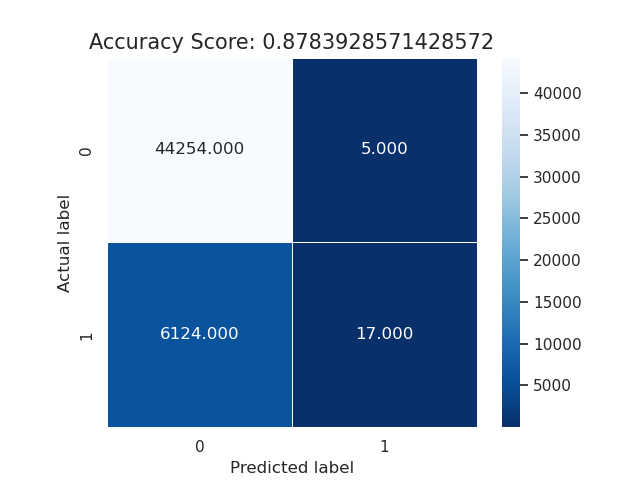

In [28]:
cm = metrics.confusion_matrix(y_test, predictions)
score = clf.score(x_test, y_test)

plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Cross validation example

In [29]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df, df_rf, cv = 10) # mse because no outliers, 10 folds

In [31]:
display_scores(scores)

Scores: [0.87718254 0.87706349 0.87734127 0.87718254 0.87698413 0.87722222
 0.87710317 0.87706349 0.87698413 0.87702381]
Mean: 0.8771150793650794
Standard deviation: 0.00010946916050898943


## Models fine-tuning

### Using Grid Search (set hyperparameters)

In [38]:
from sklearn.model_selection import GridSearchCV

# 2x9 = 18 rounds of training
params = {'criterion':['gini','entropy'],'max_depth':[4,8,12,20,30,50,75,100,150]}

clf = DecisionTreeClassifier(random_state=0) # example with decision tree
# train across 5 folds, that's a total of 18x5 rounds
grid_search = GridSearchCV(clf, params, cv=5, return_train_score=True)
grid_search.fit(df, df_rf)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 20, 30, 50, 75, 100, 150]},
             return_train_score=True)

In [39]:
clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [40]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 75}

In [41]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=75, random_state=0)

In [42]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.529874,0.025583,0.007674,0.000294,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.877956,0.877778,0.877282,...,0.877099,0.001180,18,0.877693,0.877525,0.877331,0.877560,0.877922,0.877606,0.000196
1,1.045650,0.040547,0.008433,0.000722,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.880456,0.880556,0.879762,...,0.878282,0.003141,15,0.879291,0.879315,0.879410,0.879767,0.880471,0.879651,0.000444
2,1.598225,0.100864,0.008633,0.000456,gini,12,"{'criterion': 'gini', 'max_depth': 12}",0.883591,0.883254,0.881528,...,0.879278,0.005521,13,0.881136,0.881438,0.881592,0.882956,0.882783,0.881981,0.000742
3,2.974112,0.331230,0.010927,0.000754,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.890675,0.889425,0.887103,...,0.881198,0.011877,11,0.885253,0.885779,0.887063,0.889762,0.887991,0.887170,0.001613
4,5.068741,0.318308,0.012912,0.000633,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.898948,0.898849,0.891964,...,0.883103,0.020380,9,0.890417,0.893249,0.894400,0.897039,0.896379,0.894297,0.002367
5,10.286229,0.982034,0.017781,0.001330,gini,50,"{'criterion': 'gini', 'max_depth': 50}",0.917718,0.912679,0.901012,...,0.886778,0.035555,2,0.904117,0.906766,0.908621,0.912396,0.908328,0.908046,0.002698
6,17.500117,2.034905,0.025359,0.001840,gini,75,"{'criterion': 'gini', 'max_depth': 75}",0.929802,0.921210,0.905714,...,0.886992,0.049403,1,0.915293,0.919256,0.921508,0.924727,0.918849,0.919927,0.003119
7,23.641472,3.198500,0.027105,0.001678,gini,100,"{'criterion': 'gini', 'max_depth': 100}",0.930992,0.922540,0.908611,...,0.884444,0.057010,7,0.922173,0.925977,0.929727,0.931017,0.921672,0.926113,0.003805
8,32.452350,6.837521,0.031379,0.003019,gini,150,"{'criterion': 'gini', 'max_depth': 150}",0.931071,0.922540,0.908770,...,0.882671,0.060740,10,0.931066,0.934474,0.938477,0.939826,0.922783,0.933325,0.006105
9,0.533033,0.020998,0.007524,0.000161,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.877440,0.877857,0.877123,...,0.877246,0.000599,17,0.877510,0.877401,0.877247,0.877450,0.877629,0.877447,0.000126


### Using Randomized Search

In [45]:
from sklearn.model_selection import RandomizedSearchCV

knn = KNeighborsClassifier()

k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_distrib = {'n_neighbors': k_range, 'weights': weight_options}
              
rnd_search = RandomizedSearchCV(knn, param_distrib, cv=10, scoring='accuracy', n_iter=10, random_state=0)

rnd_search.fit(df, df_rf)

KeyboardInterrupt: 

In [ ]:
rnd_search.best_estimatr_

In [ ]:
pd.DataFrame(rnd_search.cv_results_)

In [ ]:
rnd_search.grid_scores_